# Exercice 2: The birthday paradox and statistics


## Q1: Cryptographic hash functions
A cryptographic hash function is a function $F: \{0, 1\}^m \rightarrow \{0,1\}^n$ satisfying the following properties:

1. It is easy to compute $F(x)$ for all $x \in \{0, 1\}^m$. 
2. Given a $y \in \{0, 1\}^n$, it is hard to find an $x \in \{0, 1\}^m$ such that $F(x) = y$.
3. It is hard to find two elements $x_1 \neq x_2$ that have the same image: $F(x_1) = F(x_2)$. 

Usually the domain size is greater than the range (i.e. $m > n$). Therefore it must be possible to solve problems 2 or 3 by brute force. In this exercise we will consider the following hash function:

In [3]:
import random
import hashlib
def h(s, l=None):
    """Compute SHA256 hash value of x for a given output length l
    s: string
    l: non zero positive integer
    """
    a = hashlib.sha256(str(s).encode())
    b = a.hexdigest()
    if l:
        b = b[0:l]
    return b

The function defined above takes two integers $x$ and $l$ and returns a character string of length $l$. The output is the *image* and $x$ is referred to as the *preimage*.


(a) Use the hash function to compute the hash values of the strings 'bonjour' and 'bonjour1'. Are there any similarities between the two results?

Note that the function can also be applied to integers. Example: ```h(1234, 4)```.

(b) Generate random integers (or strings) and find an input whose image under $h(x, 4)$ is "abcd". How many times does $h(x, 4)$ need to be evaluated before finding the preimage? Complete the function ```preimageof``` below.


In [ ]:
print(h("bonjour"))
print(h("bonjOur"))
print(h(1234, 4))

In [ ]:
def preimageof(s, l):
    """ Find the preimage of string s under the function h. 
    """
    r = random.randrange(10000000)
    i = 1
    while h(r,l) != s:
        r = random.randrange(10000000)
        i += 1
    print(str(i) + " calls to h")
    return r

# the following should return 'True':
x = preimageof('abcd', 4)
print(h(x,4) == 'abcd')

(c) Find two integers with the same image. How many times has $h(x, 4)$ been computed? Complete the function ```findcollision```.

In [ ]:
def findcollision(length):
    """
    Find a collision of outputs of given length from the function h by 
    computing the function values for random inputs
    length: non zero positive integer
    """
    i = 1
    d = {}
    x = random.randrange(1000000)
    r = h(x, length)
    
    while r not in d or d[r] == x:
        d[r] = x
        x = random.randrange(1000000)
        r = h(x, length)
        i += 1
    x1, x2 = d[r], x

    print(str(i) + " calls to h")
    return [x1, x2]

length = 6
[x1, x2] = findcollision(length)
print('préimage:', x1, x2)
y1 = h(x1, length)
y2 = h(x2, length)
print('images:', y1, y2)
print(x1 != x2 and y1 == y2)

(d) Find preimages of "a", "ab", "abc" and "abcde" for $h(x, 1), h(x, 2), h(x, 3)$ and $h(x, 5)$ respectively. List the number of computations (of the hash function). 

In [ ]:
print('preimageof("a", 1)')
preimageof("a", 1)
print('preimageof("ab", 2)')
preimageof("ab", 2)
print('preimageof("abc", 3)')
preimageof("abc", 3)
print('preimageof("abcde", 5)')
preimageof("abcde", 5)
None

(e) Find pairs of integers that have the same image under $h(x, 1)$. Same question for $h(x, 2), h(x, 3)$ and $h(x, 5)$ respectively. Compare the number of computations with the results from question (d) and explain the observed differences. 


In [ ]:
print("findcollision(1)")
findcollision(1)
print("findcollision(2)")
findcollision(2)
print("findcollision(3)")
findcollision(3)
print("findcollision(5)")
findcollision(5)
None

It is harder to find a preimage than finding a collision, because when we try to find a preimage we can only test against one value but when we try to find a collision we can test against all the other images we have already calculated.

## Q2: Merkle key establishment based on the birthday paradox

A key exchange protocol allows two persons (Alice and Bob) to share a piece of secret information ('the key'). We assume that a third person (Eve) intercepts all communication between Alice and Bob. Key exchange protocols are designed in such a way that Alice and Bob can compute the key in an easy way, while it is significantly harder for Eve to find the key.

Let $h: \{1, ..., n^2\} \rightarrow R$ be a (publicly known) hash function where $R$ is some range of size greater than $n^2$. To create a shared key, Alice and Bob perform the following steps.

1. Alice samples $n$ random elements $x_1, ..., x_n$ from the set $\{1, ..., n^2\}$.
2. Alice computes the images $y_1 = h(x_1), ..., y_n = h(x_n)$ using the hash function. She sends this list of images to Bob.
3. Bob computes the hash function on random inputs from the set $\{1, ..., n^2\}$ until he finds **one of the $n$ values** in the list $y_1, ..., y_n$. He returns to Alice the image $y_i$ corresponding to the preimage $x_i$ that he found. 
4. Alice looks up in her list $x_1, ..., x_n$ the preimage corresponding to $y_i$. Now Alice and Bob share the secret value $x_i$. 

(a) How many computations (of the hash function) do Alice and Bob perform on average during the protocol?


Alice and Bob perform n computations on average


(b) How can Eve find the key $x_i$ and how many times on average will she have to compute the hash function?

Eve will have to perform n² computations on average.


In this exercise, we will use the hash function ```h(x, 40)``` from Q1. 

(c) Implement functions simulating Alice, Bob and Eve. Compare the number of computations performed by Bob and Eve for $n = 100$. 


In [7]:
# use the function h(x,40)
l = 40
n = 5000

# complete and execute these 3 functions:

def alice(n):
    X = [random.randrange(n*n) for i in range(n)]
    Y = [h(x, l) for x in X]
    print(str(n) + " calls to h")
    return [X, Y]

def bob(Y, n):
    preimage = random.randrange(n*n)
    image = h(preimage, l) 
    i = 1
    while image not in Y:
        i += 1
        preimage = random.randrange(n*n)
        image = h(preimage, l) 
    print(str(i) + " calls to h")
    print(preimage, image)
    return [preimage, image]

def eve(image, n):
    preimage = random.randrange(n*n)
    i = 1
    while h(preimage, l) != image:
        preimage = random.randrange(n*n)
        i += 1
    print(str(i) + " calls to h")
    return h(preimage, l)


In [8]:
print("alice:")
a = alice(n)
print("bob:")
b = bob(a[1], n)
print("eve:")
e = eve(b[1], n)

alice:
5000 calls to h
bob:
1421 calls to h
14184948 4d5aaf84249b38c1ea7bc77cca9065db800fc121
eve:
4771944 calls to h


(d) Find a value for the parameter $n$ for which the key exchange is 'safe', that is: Eve does not succeed within 1 minute, while Bob is able to perform all of his computations within a second.  


A good value for n could be 5000.

Example output for n = 5000:

    alice:
    5000 calls to h
    bob:
    2505 calls to h
    eve:
    53233588 calls to h

## Q3: Correlations

The total number of students present in the science faculty building at any given hour of the day can be modeled as a sum of two normal distributions:

In [1]:
import numpy as np
L = []
students = list()
for i in range(1000):
    L.append(int(np.random.normal(10, 1.5)))
    L.append(int(np.random.normal(15, 1.5)))
for time in range(24):
    students.append(L.count(time))
    
print(students)

[0, 0, 0, 0, 0, 2, 15, 74, 167, 262, 236, 190, 125, 189, 256, 241, 162, 62, 16, 1, 1, 1, 0, 0]


The distributions are centered around 10 AM and 3 PM and have a standard deviation of $1.5$. The amount of coffee consumed at any given hour can also be modeled as a sum of two normal distributions. These two distributions are centered around $10h30$ AM and $4$ PM and both have a standard deviation of $0.3$.



In [2]:
import matplotlib.pyplot as plt
L = list()
coffee = list()
for i in range(200):
    L.append(int(np.random.normal(10.5, .3)))
    L.append(int(np.random.normal(16, .3)))
for time in range(24):
    coffee.append(L.count(time))
    
print(coffee)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 178, 14, 0, 0, 0, 94, 106, 0, 0, 0, 0, 0, 0, 0]


In [3]:
daylight = list(np.zeros(24))
for i in range(12):
    daylight[i+7] = 1
print(daylight)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0]


(a) Make a plot of the number of students at any given hour. In the same graph, plot the amount of coffee consumed. Is there a relation between the two data? 

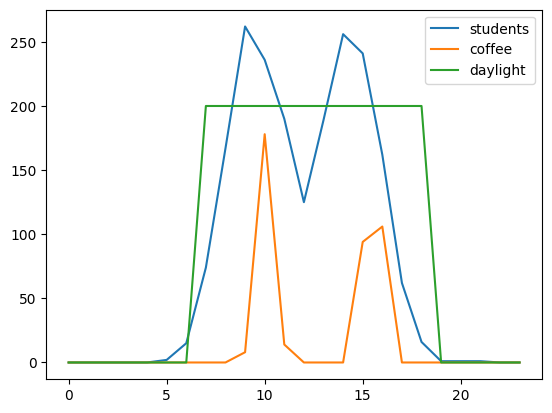

In [4]:
plt.plot(students)
plt.plot(coffee)
plt.plot([d * 200 for d in daylight])
plt.legend(["students", "coffee", "daylight"])
plt.show
None

Looking at this plot, it seems that there is a relation between the two data.


(b) Make a scatter plot with on the y-axis the amount of coffee consumed and on the x-axis the number of students. Are the points aligned? Use numpy to compute the corrolation coefficient.

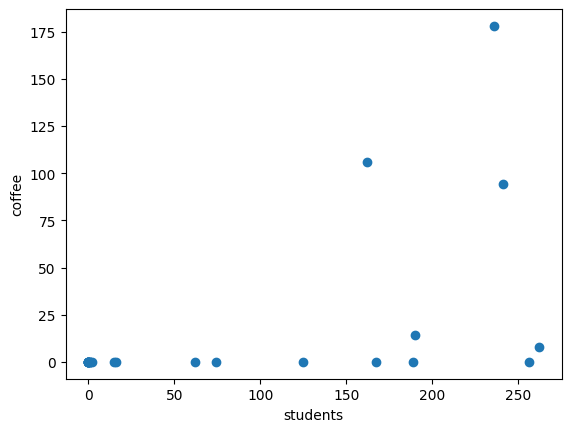

Correlation coefficient: 0.518455502444685


In [5]:
plt.scatter(students, coffee)
plt.xlabel("students")
plt.ylabel("coffee")
plt.show()
print("Correlation coefficient: " + str(np.corrcoef(students, coffee)[1, 0]))

The points are not aligned and the correlation coefficient is far from one. In the end, there might be no relation between the two data.

Consider the list:

In [ ]:
daylight = list(np.zeros(24))
for i in range(12):
    daylight[i+7] = 1
print(daylight)

The i-th position of the list is non zero if and only if we can see clear daylight on the i-th hour of the day. 

(c) In the graph of (a), add a plot of the list representing the daylight. Does there seem to be a relation between the number of students and the daylight?

(d) Make a scatter plot of the two data. Are the points aligned? 


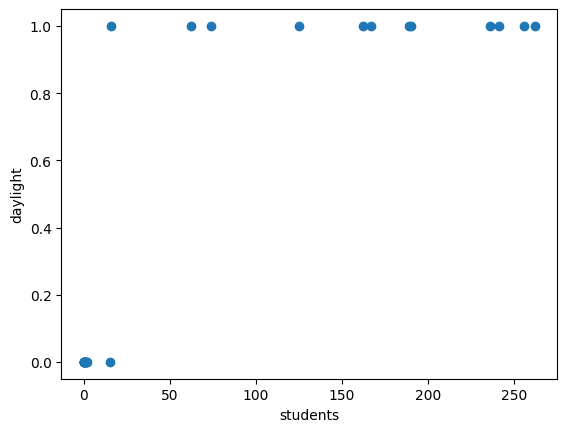

Correlation coefficient: 0.8294179148781399


In [6]:
plt.scatter(students, daylight)
plt.xlabel("students")
plt.ylabel("daylight")
plt.show()
print("Correlation coefficient: " + str(np.corrcoef(students, daylight)[1, 0]))

There seems to be a relation between the number of students and daylight because most of the points are aligned when there is daylight.

The average amount of rain at any given hour follows a uniform distribution:

In [7]:
L = list()
rain =  list(np.zeros(24))
for i in range(1000):
    L.append(int(np.random.uniform(0, 24)))
for time in range(24):
    rain[time] = L.count(time)
    
print(rain)

[42, 32, 37, 45, 36, 50, 41, 38, 46, 37, 35, 41, 45, 41, 43, 42, 51, 39, 45, 49, 50, 50, 35, 30]



(f) Using scatter plots and correlation coefficients, find out if there is a relation between the number of students in the building and the average amount of rain at any given hour.

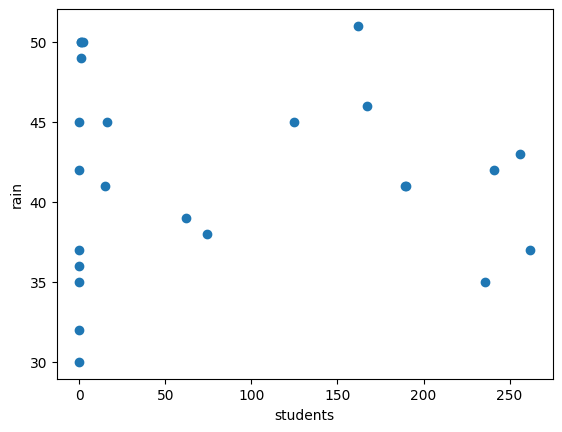

Correlation coefficient: -0.02370734295054064


In [8]:
plt.scatter(students, rain)
plt.xlabel("students")
plt.ylabel("rain")
plt.show()
print("Correlation coefficient: " + str(np.corrcoef(students, rain)[1, 0]))

There is absolutely no relation between the number of students in the building and the average amount of rain.